<a href="https://colab.research.google.com/github/Gr3gP/Active-Satellites/blob/main/Active_Satellite_Research_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction**


In this paper we will look at a data set containing active satellites in Earth orbit. We will look at the relationship between average dry masses of satellites in the same orbit. We will then turn our attention to the average launch mass of satellites in each orbit. 

# **Hypothesis**

**H0**: There is no significant difference in the average dry mass of satellites in LEO, GEO, MEO, and Elliptical Earth orbits.

**Ha**: There is a significant difference between the average dry mass of satellites in LEO, GEO, MEO, and Elliptical Earth orbits.

# **Data**

This data comes from  __[Kaggle](https://www.kaggle.com/ucsusa/active-satellites?select=database.csv)__ The dataset contains 1,421 total satellites.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files

uploaded = files.upload()

Saving Active Satellites in Orbit UPDATED.csv to Active Satellites in Orbit UPDATED.csv


In [3]:
import io 
sat_df = pd.read_csv(io.BytesIO(uploaded['Active Satellites in Orbit UPDATED.csv']))
print(sat_df)

     Official Name of Satellite  ... NORAD Number
0                      AAUSat-4  ...        41460
1                         ABS-2  ...        39508
2                        ABS-2A  ...        41588
3                         ABS-3  ...        24901
4                        ABS-3A  ...        40424
...                         ...  ...          ...
1414                Zhongxing 9  ...        33051
1415                   Zijing 1  ...        40919
1416               Ziyuan 1-02C  ...        38038
1417                   Ziyuan 3  ...        38046
1418                  Ziyan 3-2  ...        41556

[1419 rows x 26 columns]


In [4]:
sat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1419 entries, 0 to 1418
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Official Name of Satellite                   1419 non-null   object 
 1   Country/Organization of UN Registry          1419 non-null   object 
 2   Operator/Owner                               1419 non-null   object 
 3   Country of Operator/Owner                    1419 non-null   object 
 4   Users                                        1419 non-null   object 
 5   Purpose                                      1419 non-null   object 
 6   Detailed Purpose                             369 non-null    object 
 7   Class of Orbit                               1419 non-null   object 
 8   Type of Orbit                                899 non-null    object 
 9   Longitude of Geosynchronous Orbit (Degrees)  1402 non-null   float64
 10  

We will rename the columns we need for ease of use as shown below.

In [5]:
sat_df = sat_df.rename(columns= {"Dry Mass (Kilograms)": "dry_mass_kg"})
sat_df = sat_df.rename(columns= {"Launch Mass (Kilograms)": "launch_mass_kg"})
sat_df = sat_df.rename(columns={"Class of Orbit": "class_orbit"})

We will also need to convert some object columns to floats for our analysis. mainly dry_mass_kg and launch_mass_kg as shown below.

In [6]:
sat_df["dry_mass_kg"] = pd.to_numeric(sat_df.dry_mass_kg, errors='coerce')
sat_df["launch_mass_kg"] = pd.to_numeric(sat_df.launch_mass_kg, errors='coerce')

sat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1419 entries, 0 to 1418
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Official Name of Satellite                   1419 non-null   object 
 1   Country/Organization of UN Registry          1419 non-null   object 
 2   Operator/Owner                               1419 non-null   object 
 3   Country of Operator/Owner                    1419 non-null   object 
 4   Users                                        1419 non-null   object 
 5   Purpose                                      1419 non-null   object 
 6   Detailed Purpose                             369 non-null    object 
 7   class_orbit                                  1419 non-null   object 
 8   Type of Orbit                                899 non-null    object 
 9   Longitude of Geosynchronous Orbit (Degrees)  1402 non-null   float64
 10  

## **Methods**  

For this analysis we are going to clean the data first, then create 4 data frames containing data for class of orbit. Afer we will get the descriptive stats for the dataframes and inspect the histograms for normality, skewness, and kurtosis to determine whther we can test our hypothesis using parametric or non-parametric tests.

In [7]:
sat_df.groupby(['class_orbit']).agg('count')

,Official Name of Satellite,Country/Organization of UN Registry,Operator/Owner,Country of Operator/Owner,Users,Purpose,Detailed Purpose,Type of Orbit,Longitude of Geosynchronous Orbit (Degrees),Perigee (Kilometers),Apogee (Kilometers),Eccentricity,Inclination (Degrees),Period (Minutes),launch_mass_kg,dry_mass_kg,Power (Watts),Date of Launch,Expected Lifetime (Years),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number
class_orbit,,,,,,,,,,,,,,,,,,,,,,,,,
Elliptical,37,37,37,37,37,37,11,24,37,37,37,37,37,37,33,12,12,37,22,37,37,37,37,37,37
GEO,506,506,506,506,506,506,41,0,493,506,506,506,506,504,488,245,276,506,439,506,506,506,506,506,506
LEO,780,780,780,780,780,780,316,779,776,780,780,780,780,780,696,186,291,777,432,780,780,780,780,780,780
MEO,96,96,96,96,96,96,1,96,96,96,96,96,96,96,95,18,70,96,83,96,96,96,96,96,96


In [8]:
sat_df['class_orbit'].unique()

array(['LEO', 'GEO', 'MEO', 'Elliptical'], dtype=object)

**FIll in Missing Dry Mass Values**

We have a lot of missing dry-mass values. For this reason, we will need to fill them with a value. We will fill the empty dry mass values with the mean of each orbit. This seems to be the most appropriate as interpolation doesnt make much sense and the median will not change the outcome very much.



In [9]:
sat_df['dry_mass_kg'] = sat_df['dry_mass_kg'].fillna(sat_df.groupby('class_orbit')['dry_mass_kg'].transform('mean'))

In [10]:
sat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1419 entries, 0 to 1418
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Official Name of Satellite                   1419 non-null   object 
 1   Country/Organization of UN Registry          1419 non-null   object 
 2   Operator/Owner                               1419 non-null   object 
 3   Country of Operator/Owner                    1419 non-null   object 
 4   Users                                        1419 non-null   object 
 5   Purpose                                      1419 non-null   object 
 6   Detailed Purpose                             369 non-null    object 
 7   class_orbit                                  1419 non-null   object 
 8   Type of Orbit                                899 non-null    object 
 9   Longitude of Geosynchronous Orbit (Degrees)  1402 non-null   float64
 10  

Now that we've made our adjustments, we can begin investigating the data. A tables been created above grouping satellites by their orbit. We can see we have an issue with the LEO orbit not grouping completely. After a bit of investigation we can see that group has no dry_mass_kg values and we can ignore it since it will have no impact on our analysis.

Below we are creating a DataFrame for each respective orbit class. 

In [11]:
LEO_sat_df = sat_df[(sat_df['class_orbit'] == 'LEO')]
MEO_sat_df = sat_df[(sat_df['class_orbit'] == 'MEO')]
GEO_sat_df = sat_df[(sat_df['class_orbit'] == 'GEO')]
EEO_sat_df = sat_df[(sat_df['class_orbit'] == 'Elliptical')]

Now that we have our data parsed and in DataFrames. we can begin our analyssis. We have ran the descriptive statistics for each orbit class with  counts, minimums, maximums, and means displayed below.

In [12]:
print('----------LEO Statistics----------')
print(LEO_sat_df['dry_mass_kg'].describe())
print("----------MEO Statistics----------")
print(MEO_sat_df['dry_mass_kg'].describe())
print('----------GEO Statistics----------')
print(GEO_sat_df['dry_mass_kg'].describe())
print('-----------EEO Statistics----------')
print(EEO_sat_df['dry_mass_kg'].describe())

----------LEO Statistics----------
count      780.000000
mean       619.575269
std        637.308607
min          1.000000
25%        619.575269
50%        619.575269
75%        619.575269
max      10000.000000
Name: dry_mass_kg, dtype: float64
----------MEO Statistics----------
count     96.000000
mean     944.444444
std       43.775076
min      660.000000
25%      944.444444
50%      944.444444
75%      944.444444
max      980.000000
Name: dry_mass_kg, dtype: float64
----------GEO Statistics----------
count     506.000000
mean     1820.481633
std       606.365118
min       320.000000
25%      1700.000000
50%      1820.481633
75%      1820.481633
max      5624.000000
Name: dry_mass_kg, dtype: float64
-----------EEO Statistics----------
count      37.000000
mean     1125.000000
std       650.781752
min        77.000000
25%      1125.000000
50%      1125.000000
75%      1125.000000
max      3414.000000
Name: dry_mass_kg, dtype: float64


The sample sizes(counts) for LEO(186) and GEO(245) seem to be large enough but MEO(18) and EEO(12) are quite a bit smaller. We will continue with the planned analysis, but may want to rerun it with just LEO and GEO or even change the dry_mass_kg variable to launch_mass_kg since we have larger samples for all the orbits; LEO(695), GEO(488), MEO(95), EEO(33). This does however go beyond the scope of this analysis. 

##Visualizations

-heat map

- whisker plot for outliers

-time series plot to see how satellite weights have changed through time

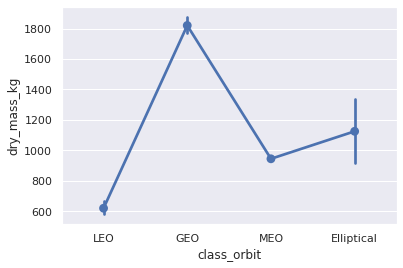

In [13]:
sns.set_theme(style="darkgrid")
ax = sns.pointplot(x="class_orbit", y="dry_mass_kg", data=sat_df)

([<matplotlib.axis.YTick at 0x7f6feac63e90>,
 [Text(0, 0.5, 'LGO(D)'),
  Text(0, 1.5, 'Perigree(Km)'),
  Text(0, 2.5, 'Apogee(Km)'),
  Text(0, 3.5, 'Eccentricity'),
  Text(0, 4.5, 'Inclination(D)'),
  Text(0, 5.5, 'Launch Mass(Kg)'),
  Text(0, 6.5, 'Dry Mass (Kg)'),
  Text(0, 7.5, 'NOARD ID')])

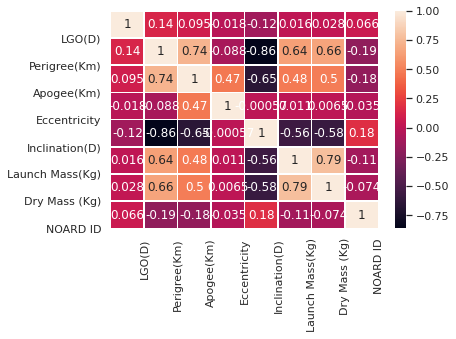

In [19]:
hmap = sns.heatmap(sat_df.corr(), annot=True, linewidths=0.5)
plt.xticks([1,2,3,4,5,6,7,8], ['LGO(D)', 'Perigree(Km)', 'Apogee(Km)', 'Eccentricity', 'Inclination(D)', 'Launch Mass(Kg)', 'Dry Mass (Kg)', 'NOARD ID'])
plt.yticks([1,2,3,4,5,6,7,8], ['LGO(D)', 'Perigree(Km)', 'Apogee(Km)', 'Eccentricity', 'Inclination(D)', 'Launch Mass(Kg)', 'Dry Mass (Kg)', 'NOARD ID'])

Above is a correlation heatmap of out satellite features. Of interest to note is:

 - Dry mass is positively correlated with Pergiree(0.47) and Apogee(0.37). 
 - Dry mass is negatively correlated with Inclination(-0.39).

Can we infer anything about our data using the above information? I think about this in the following way; Pergiree is the furthest point in a satellites orbit and would therefore mean the satellite is further from the Earth, exposing it to more interstellar debris and forces. Therefore, the satellite might have to heavier than the others. 

Inclination is negatively correlated with dry mass. One posssible explanation is that when the satellite is traveling 'against' or out of the bodies equatorial plane, the satellite is subjected to less force.  

Below we can see histograms of dry_mass_kg for each class_orbit. We can see that the only seemingly normally distributed class_orbit is GEO. The rest are quite sporadic and it may not be useful to perform a t-test with. 

Text(0, 0.5, 'Satellite Count')

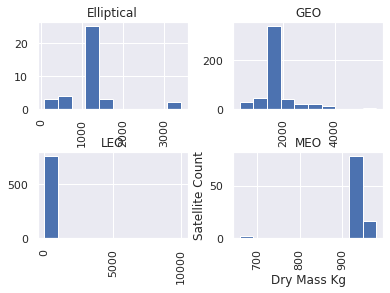

In [21]:
sat_df['dry_mass_kg'].hist(by = sat_df['class_orbit'])
plt.xlabel('Dry Mass Kg')
plt.ylabel('Satellite Count')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


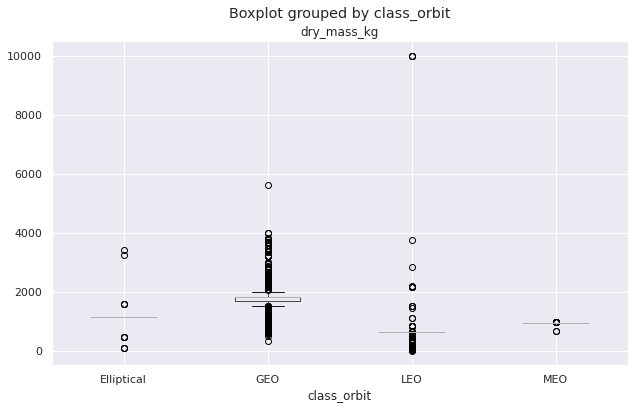

In [22]:
sat_df.boxplot('dry_mass_kg', by='class_orbit', figsize=(10, 6))

##Statistics

It would appear the only normally distributed class orbit is GEO. This means we will be using non-parametric tests for our analysis. The other class orbits are clearly not normally distributed. The boxplot reinforces this and even when we look at the GEO data, it appears to be less normal than the histogram showed.

In [23]:
print(stats.describe(EEO_sat_df['dry_mass_kg']))
print(stats.describe(LEO_sat_df['dry_mass_kg']))
print(stats.describe(GEO_sat_df['dry_mass_kg']))
print(stats.describe(MEO_sat_df['dry_mass_kg']))

DescribeResult(nobs=37, minmax=(77.0, 3414.0), mean=1125.0, variance=423516.8888888889, skewness=1.745997023841783, kurtosis=5.2188085301665375)
DescribeResult(nobs=780, minmax=(1.0, 10000.0), mean=619.5752688172043, variance=406162.2611633331, skewness=12.538315067999386, kurtosis=179.20623492068327)
DescribeResult(nobs=506, minmax=(320.0, 5624.0), mean=1820.481632653061, variance=367678.6557769247, skewness=1.2636023681833406, kurtosis=5.092906845733978)
DescribeResult(nobs=96, minmax=(660.0, 980.0), mean=944.4444444444445, variance=1916.2573099415204, skewness=-5.715476066494084, kurtosis=35.000000000000014)


Looking at the above Kurtosis and Skewness for our variables, they all fall outside our threhold range of -3 and 3. I am still going to continue testing our dataset with non-parametric tests since we have determined our data is not normally distributed and tehse tests will yield more accurate observations. 

Next, we will test this assumption with the Shapiro-Wilkes test for normality.

\begin{align} 
W=\frac { (\sum_{i=1}^n a_ix_{(i)} )^2}{ \sum_{i=1}^n (x_i-\bar{x})^2}
\end{align}

$x_{(i)}$ is the *i*th smallest number in the sample.  
$a_i$ is a constant determined by the sample size and acts as a scaling value.  
$\bar{x}$ is the sample mean.  
$x_i$ is the *i*th observation in the sample.

The equation computes the ratio between the value that would be expected for a normally-distributed sample of that size containing that much information (the numerator of the fraction above) and the actual sum of the differences between each of the values in the variable and the sample mean (the denominator).  Values close to 1 indicate that the distribution is similar to a normal distribution.  The smaller the W statistic becomes, the more divergence there is between the distribution of the data and the normal distribution.  The Shapiro-Wilk test also provides a p-value: one under <.05 indicates non-normality at the 95% confidence level.

In [24]:
stats.shapiro(GEO_sat_df['dry_mass_kg'])

(0.7974003553390503, 1.2212092391399366e-24)

In [25]:
stats.shapiro(LEO_sat_df['dry_mass_kg'])

(0.1748499870300293, 0.0)

In [26]:
stats.shapiro(MEO_sat_df['dry_mass_kg'])

(0.2867780327796936, 1.8481953627744013e-19)

In [27]:
stats.shapiro(EEO_sat_df['dry_mass_kg'])

(0.6795907020568848, 1.0375181602739758e-07)

Looking at the Shapiro-Wilkes test results, the p-values and W statistic confirm our data is not normally distrbuted at the 95% confidence level. Based on this, we are going to assume we have non-normally distributed data. We will now use the Kruskal-Wallis test to test for a significant difference between our data. 

\begin{equation}
H=(N-1)\frac{\sum_{i=1}^gn_i(\bar{r}_i-\bar{r})^2}{\sum_{i=1}^g\sum_{j=1}^{n_i}(r_{ij}-\bar{r})^2}
\end{equation}

*H* is the test statistic.  
$n_i$ is the number of datapoints in group *i*.   
$r_{ij}$ is the rank of datapoint *j* in group *i* when ranked among all datapoints in all groups.  
*N* is the total number of datapoints.  
$\bar{r}_i$ is the average rank of all datapoints in group *i*.  
$\bar{r}$ is the average of all the ranks, and can be calculated as $\frac12(N+1)$.  


This test works by first converting all the data into ranks from 1 (highest value) to N (lowest).  Then the overall average rank $\bar{r}$ is subtracted from the average rank for each group $\bar{r}_i$.  For each group, the difference is squared, then multiplied by the size of the group $n_i$ .  Finally, the scaled squared differences are summed to create the numerator.  This provides information on how different the mean ranks for each group are from one another.

Then, for each observation within a group, the average overall rank $\bar{r}$ is subtracted from the rank of each observation $r_{ij}$ .  This difference is squared and summed.  Finally, the group-level sums are added together to create the denominator.  This tells us how much variability there is within each group, which is then pooled to create an estimate of the variance of the sample.

The test statistic *H* represents the ratio of the divergence of each group mean rank from the overall mean rank relative to the variance in ranks within each group, multiplied by the size of the sample *N*-1.  The larger the value of H, the more likely it is that one of the groups differs meaningfully from the others in the population. The test does not indicate which samples are larger or by how much.


In [35]:
stats.kruskal(GEO_sat_df['dry_mass_kg'], MEO_sat_df['dry_mass_kg'], EEO_sat_df['dry_mass_kg'], LEO_sat_df['dry_mass_kg'])

KruskalResult(statistic=1026.3861676889992, pvalue=3.3969840306762724e-222)

The test is telling us there is a significant difference between the dry masses. But which? Next, we will run pairwise Kruskal Wallis tests to identify which orbits dry mass is significantly different. 

In [29]:
stats.kruskal(GEO_sat_df['dry_mass_kg'], MEO_sat_df['dry_mass_kg'])

KruskalResult(statistic=178.18178460192524, pvalue=1.208986398158534e-40)

In [30]:
stats.kruskal(GEO_sat_df['dry_mass_kg'], LEO_sat_df['dry_mass_kg'])

KruskalResult(statistic=902.7728905085137, pvalue=2.4492250057808588e-198)

In [31]:
stats.kruskal(GEO_sat_df['dry_mass_kg'], EEO_sat_df['dry_mass_kg'])

KruskalResult(statistic=59.84467354302327, pvalue=1.0264677386391514e-14)

In [32]:
stats.kruskal(LEO_sat_df['dry_mass_kg'], MEO_sat_df['dry_mass_kg'])

KruskalResult(statistic=342.67418464808543, pvalue=1.6691192771817664e-76)

In [33]:
stats.kruskal(LEO_sat_df['dry_mass_kg'], EEO_sat_df['dry_mass_kg'])

KruskalResult(statistic=68.19986482437729, pvalue=1.4773587451825247e-16)

In [34]:
stats.kruskal(EEO_sat_df['dry_mass_kg'], MEO_sat_df['dry_mass_kg'])

KruskalResult(statistic=38.90192913558297, pvalue=4.4563999488284796e-10)

Looking at the above test statistic, it appears we can reject our null-hypothesis based on the p-value and that GEO is the odd one out. 

# **Results**

Looking at our data and the above Kruskal-Wallis test based on a p-value of .01, it appears that there is a significant difference between the the dry masses of satellites in different orbits. 


# **Recommendations**

After performing this anaylsis, it may be intereting to run it again using launch mass since the sample sizes are larger. It may yield some cleaner results, but it really depends on what question we are trying to answer. It would also be logical to continue this analysis as a time series analysis looking at how satellites' dry masses in a particular orbit have significantly changed over time. 